# Dataset: Raio-X da Administração Pública Federal

Veja:
* [Painel](https://gov.br/raiox) do Raio-X
* [dataset](https://dados.gov.br/dataset/raio-x-da-administracao-publica-federal)

## Bibliotecas do Python utilizadas

In [3]:
from frictionless import Package

In [17]:
import plotly.express as px

## Leitura do pacote de dados (data package)

In [4]:
package = Package('http://repositorio.dados.gov.br/seges/raio-x/raiox-2022-01.zip')

In [6]:
package.resource_names

['alocacao-servidores',
 'cargos-funcoes-distribuidos-ocupados',
 'cargos-funcoes-perfil',
 'custeio-administrativo',
 'orcamento',
 'patrimonio-uniao',
 'pessoal-forca-trabalho',
 'solucoes-modernizacao',
 'transformacao-digital']

In [11]:
patrimonio = package.get_resource('patrimonio-uniao')

In [12]:
df = patrimonio.to_pandas()

In [16]:
imoveis_inss = df[df.orgao_nome == 'INSTITUTO NACIONAL DO SEGURO SOCIAL']
imoveis_inss

orgao_superior_codigo_siorg                   orgao_superior_nome  \
54414                      276368  MINISTÉRIO DO TRABALHO E PREVIDÊNCIA   
54415                      276368  MINISTÉRIO DO TRABALHO E PREVIDÊNCIA   
54416                      276368  MINISTÉRIO DO TRABALHO E PREVIDÊNCIA   
54417                      276368  MINISTÉRIO DO TRABALHO E PREVIDÊNCIA   
54418                      276368  MINISTÉRIO DO TRABALHO E PREVIDÊNCIA   
...                           ...                                   ...   
54570                      276368  MINISTÉRIO DO TRABALHO E PREVIDÊNCIA   
54571                      276368  MINISTÉRIO DO TRABALHO E PREVIDÊNCIA   
54572                      276368  MINISTÉRIO DO TRABALHO E PREVIDÊNCIA   
54573                      276368  MINISTÉRIO DO TRABALHO E PREVIDÊNCIA   
54574                      276368  MINISTÉRIO DO TRABALHO E PREVIDÊNCIA   

      orgao_superior_sigla orgao_codigo_siorg  \
54414                  MTP               1934   
54415                  MTP               1934   
54416                  MTP               1934   
54417                  MTP               1934   
54418                  MTP               1934   
...                    ...                ...   
54570                  MTP               1934   
54571                  MTP               1934   
54572                  MTP               1934   
54573                  MTP               1934   
54574                  MTP               1934   

                                orgao_nome orgao_sigla  \
54414  INSTITUTO NACIONAL DO SEGURO SOCIAL        INSS   
54415  INSTITUTO NACIONAL DO SEGURO SOCIAL        INSS   
54416  INSTITUTO NACIONAL DO SEGURO SOCIAL        INSS   
54417  INSTITUTO NACIONAL DO SEGURO SOCIAL        INSS   
54418  INSTITUTO NACIONAL DO SEGURO SOCIAL        INSS   
...                                    ...         ...   
54570  INSTITUTO NACIONAL DO SEGURO SOCIAL        INSS   
54571  INSTITUTO NACIONAL DO SEGURO SOCIAL        INSS   
54572  INSTITUTO NACIONAL DO SEGURO SOCIAL        INSS   
54573  INSTITUTO NACIONAL DO SEGURO SOCIAL        INSS   
54574  INSTITUTO NACIONAL DO SEGURO SOCIAL        INSS   

                  orgao_como_no_raiox_nome orgao_como_no_raiox_sigla  \
54414  INSTITUTO NACIONAL DO SEGURO SOCIAL                      INSS   
54415  INSTITUTO NACIONAL DO SEGURO SOCIAL                      INSS   
54416  INSTITUTO NACIONAL DO SEGURO SOCIAL                      INSS   
54417  INSTITUTO NACIONAL DO SEGURO SOCIAL                      INSS   
54418  INSTITUTO NACIONAL DO SEGURO SOCIAL                      INSS   
...                                    ...                       ...   
54570  INSTITUTO NACIONAL DO SEGURO SOCIAL                      INSS   
54571  INSTITUTO NACIONAL DO SEGURO SOCIAL                      INSS   
54572  INSTITUTO NACIONAL DO SEGURO SOCIAL                      INSS   
54573  INSTITUTO NACIONAL DO SEGURO SOCIAL                      INSS   
54574  INSTITUTO NACIONAL DO SEGURO SOCIAL                      INSS   

      ano_mes_referencia          regime_utilizacao    tipo_destinacao  \
54414         2022-01-01  DISPONÍVEL PARA ALIENAÇÃO            Açude     
54415         2022-01-01  DISPONÍVEL PARA ALIENAÇÃO            Açude     
54416         2022-01-01  DISPONÍVEL PARA ALIENAÇÃO            Açude     
54417         2022-01-01  DISPONÍVEL PARA ALIENAÇÃO            Açude     
54418         2022-01-01  DISPONÍVEL PARA ALIENAÇÃO            Açude     
...                  ...                        ...                ...   
54570         2022-01-01       ESBULHADO (INVADIDO)          Cemitério   
54571         2022-01-01       ESBULHADO (INVADIDO)              Clube   
54572         2022-01-01       ESBULHADO (INVADIDO)              Clube   
54573         2022-01-01       ESBULHADO (INVADIDO)              Clube   
54574         2022-01-01       LOCAÇÃO DE TERCEIROS  Edifício / Prédio   

             tipo_imovel                                         

In [18]:
imoveis_inss.valor_imovel.describe()

count    1.610000e+02
mean     7.442543e+05
std      2.291583e+06
min      2.552640e+03
25%      6.552343e+04
50%      1.411807e+05
75%      6.499509e+05
max      2.526333e+07
Name: valor_imovel, dtype: float64

In [46]:
orgaos_maiores_valores = df.groupby(by=df.orgao_nome).sum().sort_values('valor_imovel', ascending=False).head(10).index
orgaos_maiores_valores

Index(['MINISTÉRIO DA ECONOMIA', 'FUNDAÇÃO UNIVERSIDADE DE BRASÍLIA',
       'FUNDAÇÃO NACIONAL DO ÍNDIO',
       'INSTITUTO NACIONAL DE COLONIZAÇÃO E REFORMA AGRÁRIA',
       'COMANDO DA AERONAUTICA', 'UNIVERSIDADE FEDERAL DO RIO DE JANEIRO',
       'INSTITUTO NACIONAL DE METROLOGIA, QUALIDADE E TECNOLOGIA',
       'FUNDAÇÃO UNIVERSIDADE DO AMAZONAS', 'COMANDO DO EXERCITO',
       'UNIVERSIDADE FEDERAL DO CEARÁ'],
      dtype='object', name='orgao_nome')

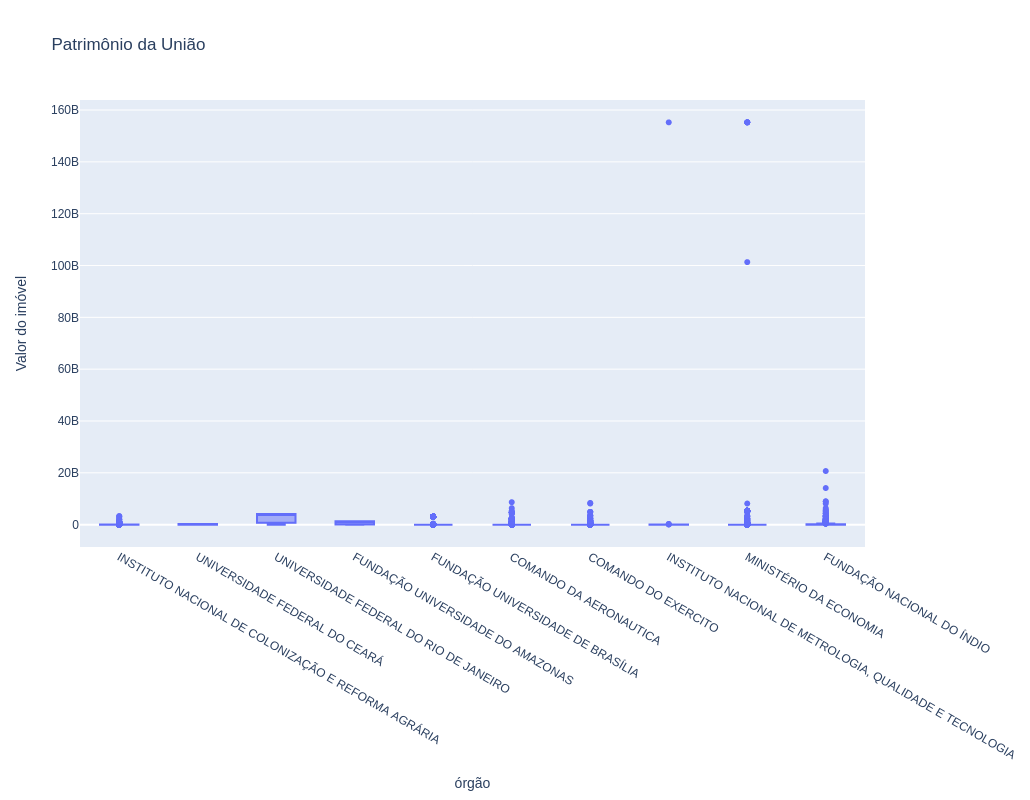

In [47]:
filtro = df.orgao_nome.isin(orgaos_maiores_valores)
px.box(
    df[filtro],
    title=patrimonio['title'],
    x=df[filtro].orgao_nome,
    y=df[filtro].valor_imovel,
    height=800,
    labels={
        'y': patrimonio['schema']['fields'][-2]['title'],
        'x': 'órgão'
    }
)